## 70 DAYS PRE-BOOTCAMP

In [7]:
import pandas as pd
import quandl
import math

In [8]:
quandl.ApiConfig.api_key = "2JbCQwzVzkWZmz9vjfNn"
df = quandl.get('WIKI/GOOGL')
print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [9]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [10]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]
df.tail()

,Adj. Close,HL_PCT,PCT_Change,Adj. Volume
Date,,,,
2018-03-21,1094.00,1.343693,0.130884,1990515.0
2018-03-22,1053.15,2.921711,-2.487014,3418154.0
2018-03-23,1026.55,3.918952,-2.360729,2413517.0
2018-03-26,1054.09,0.491419,0.332191,3272409.0
2018-03-27,1006.94,5.720301,-5.353887,2940957.0


In [11]:
forecast_col = 'Adj. Close'
forecast_out = int(math.ceil(0.01*len(df)))
df['Label'] = df[forecast_col].shift(-forecast_out)
print(df.tail())

            Adj. Close    HL_PCT  PCT_Change  Adj. Volume  Label
Date                                                            
2018-03-21     1094.00  1.343693    0.130884    1990515.0    NaN
2018-03-22     1053.15  2.921711   -2.487014    3418154.0    NaN
2018-03-23     1026.55  3.918952   -2.360729    2413517.0    NaN
2018-03-26     1054.09  0.491419    0.332191    3272409.0    NaN
2018-03-27     1006.94  5.720301   -5.353887    2940957.0    NaN


In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

[1102.06206346 1072.68952623 1020.0068159  1060.82090626 1072.96115893
 1073.20285453 1091.79017958 1111.00222769 1114.32920387 1122.39932116
 1131.78593415 1129.13433196 1148.41449184 1164.04733347 1135.95474776
 1122.17092251 1088.16295591 1102.94594662 1113.99023094 1120.9253976
 1134.7646226  1149.43645751 1180.91319175 1185.48556617 1157.69205961
 1168.37873183 1170.22930189 1153.09822707 1118.44413397 1114.7699913
 1112.64797585 1070.04231703 1042.51774156 1072.72282534 1021.55629642] 0.976976632638207 35
                     Adj. Close  HL_PCT  PCT_Change  Adj. Volume  Label  \
Date                                                                      
2018-03-08 01:00:00         NaN     NaN         NaN          NaN    NaN   
2018-03-09 01:00:00         NaN     NaN         NaN          NaN    NaN   
2018-03-10 01:00:00         NaN     NaN         NaN          NaN    NaN   
2018-03-11 01:00:00         NaN     NaN         NaN          NaN    NaN   
2018-03-12 01:00:00         NaN  

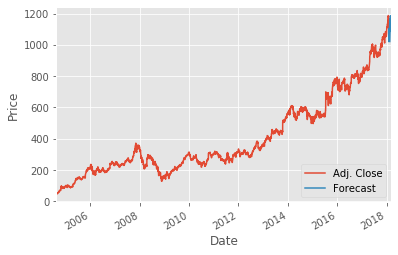

In [13]:
style.use('ggplot')

X = np.array(df.drop(['Label'], 1))
X = scale(X)

X_lately= X[-forecast_out:]
X= X[:-forecast_out]


df.dropna(inplace=True)
y = np.array(df['Label'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#lr = LinearRegression()
#lr.fit(X_train, y_train)

#with open('LinearRegressor.pickle', 'wb') as f:
#    pickle.dump(lr, f)

pickle_in = open('LinearRegressor.pickle', 'rb')
lr= pickle.load(pickle_in)

accuracy=lr.score(X_test, y_test)

forecast_set = lr.predict(X_lately)
print(forecast_set, accuracy, forecast_out)
df['Forecast'] = np.nan

#Plotting results
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date]= [np.nan for _ in range(len(df.columns)-1)] + [i]

print(df.tail())

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [3]:
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
from matplotlib import style
import random
style.use('fivethirtyeight')

0.941917148564348


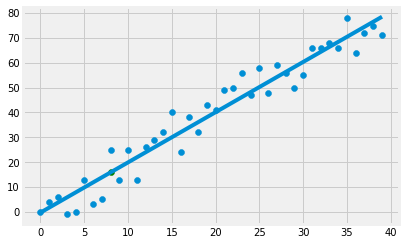

In [6]:
%matplotlib inline
#xs=np.array([1,2,3,4,5,6], dtype=np.float64)
#ys=np.array([5,4,6,5,6,7], dtype=np.float64)

def create_dataset(hm, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val+ random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)
    

def best_fit_slope_and_intercept(xs, ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys))/
          (mean(xs)**2 - mean(xs**2)))
    b = mean(ys) - m*mean(xs)
    return m, b

def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig)**2)

def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean_line = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean_line)

xs, ys = create_dataset(40, 10, 2, correlation='pos')

m, b = best_fit_slope_and_intercept(xs, ys)

regression_line = [m*x + b for x in xs]

predict_x = 8
predict_y = m*predict_x + b

r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, color='g')
plt.plot(xs, regression_line)
plt.show()


In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [27]:
df = pd.read_csv('breast-cancer-wisconsin.data')

df.drop(['id'], 1, inplace=True)
df.replace('?', -99999, inplace=True)
X = np.array(df.drop(['label'], 1))
y= np.array(df['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf= KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(accuracy)

example_measures=np.array([[4,2,1,1,1,2,3,2,1], [7,2,3,5,1,2,3,4,1]])

prediction = clf.predict(example_measures)
print(prediction)

0.9785714285714285
[2 4]


In [28]:
from math import sqrt

point1= [1, 3]
point2 = [2, 5]

eucledian_distance = sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)
print(eucledian_distance)

2.23606797749979


In [31]:
import numpy as np
import warnings
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

r


<function matplotlib.pyplot.show(*args, **kw)>

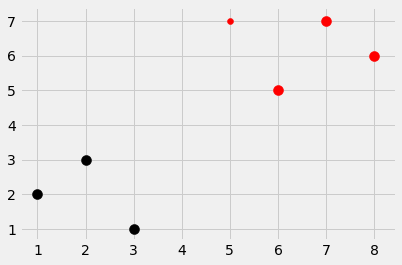

In [40]:
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('k is set to a value less than total voting groups!')
    
    distances = []
    for group in data:
        for features in data[group]:
            eucledian_distance=np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([eucledian_distance, group])
            
    votes=[i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    
    return vote_result

result = k_nearest_neighbors(dataset, new_features, k=3)
print(result)

[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]]for i in dataset]
plt.scatter(new_features[0], new_features[1], color=result)
plt.show        

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style 
import numpy as np
style.use('ggplot')

optimized a step....
optimized a step....
optimized a step....


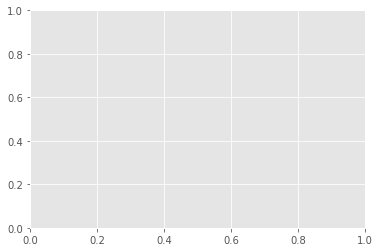

In [7]:
class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1: 'r', -1: 'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1, 1, 1)
    
    def fit(self, data):
        self.data=data
        #{||w||: [w,b]}
        opt_dict = {}
        
        transforms = [[1,1],
                     [-1,1],
                     [-1,-1],
                     [1,-1]]
        
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
        
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        
        step_sizes = [self.max_feature_value*0.1,
                     self.max_feature_value*0.01,
                     #point of expense
                     self.max_feature_value*0.001]
        
        #extremely expensive
        b_range_multiple = 5
        b_multiple=5
        
        latest_optimum = self.max_feature_value*10
        
        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum])
            
            #we can do this because CONVEX
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value * b_range_multiple), self.max_feature_value * b_range_multiple, step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        
                        found_option = True
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i
                                if not yi*(np.dot(w_t, xi)+b)>=1:
                                    found_option = False
                                    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)]=[w_t, b]
                            
                if w[0]<0:
                    optimized = True
                    print('optimized a step....')
                else:
                    w = w-step
        
        norms = sorted([n for n in opt_dict])
        opt_choice= opt_dict [norms[0]]
        
        self.w = opt_choice[0]
        self.b = opt_choice[1]
        latest_optimum = opt_choice[0][0]+step*2
        
    def predict (self, features):
        #sign (x.w+b)
        classification = np.sign(np.dot(np.array(features), self.w) + self.b)
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        
        return classification 

    def visualize(self):
        [[self.ax.scatter(x[0], x[1], s=100, color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        
        def hyperplane(x, w, b, v):
            return (-w[0]*x - b+v)/ w[1]
        
        datarange = (self.min_feature_value*0.9, self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        #(w.x + b) = 1
        #positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2], 'k')
        
        #(w.x + b) = -1
        #negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2], 'k')
        
        #(w.x + b) = 0
        #neutral support vector hyperplane
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min, hyp_x_max], [db1, db2], 'y--')
        
        plt.show()
        
data_dict = {-1:([[1,7],
                 [2,8],
                 [3,8]]),
            1:np.array([[5,1],
                       [6,-1],
                       [7,3]])}

svm = Support_Vector_Machine()
svm.fit(data = data_dict)